

## Dimensionality Reduction with UMAP for Subsurface Data Analytics in Python 

### Subsurface Machine Learning Course, The University of Texas at Austin


#### Lydia Mata Mireles, Hildebrand Department of Petroleum and Geosystems Engineering, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/lydia-mireles-0a386ab9/?lipi=urn%3Ali%3Apage%3Ad_flagship3_feed%3Buqzq%2BIMeQRuPBYf6AbEPHg%3D%3D)

#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering


#### Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Lei Liu, PhD candidate in Petroleum Engineering, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/leiliu96?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAADJA6_EBdwhSI57mLi7opLyf96GaGRqDU_E&lipi=urn%3Ali%3Apage%3Ad_flagship3_search_srp_all%3Bpu%2BHSSnoRiGyzk5WaKOUXg%3D%3D)



### Executive Summary

Dimensionality reduction is the combination of features in a dataset. This is an approach in machine learning used for the simplification of a model while preserving core information about the original features. This can enhance the visualization of the data, increase the model’s accuracy, computational performance, and the analyst’s understanding of the system. 

In this workflow, a machine learning model for dimensionality reduction is being demonstrated using the UMAP algorithm (uniform manifold approximation and projection). This cutting-edge technique seeks to learn the underlying manifold structure of the data in the high dimensional feature space and find a low dimensional embedding that closely matches the manifold’s topological structure. Thus, this preserves well the local and global structures of the data which results in efficient pattern identification, clustering, and shape retention. 

The biggest challenge of implementing UMAP is to fine tune the hyper-parameters for optimization of the model; however, with the aid of performance metrics and visualization plots, the objective is accomplished.

Based on this workflow, UMAP demonstrated the preservation of the local and global structures from the original features, robustness to noise and efficiency.






### References
This workflow was created using an existing dataset, and by modifying code/steps/strategies existing in workflows referenced herein:
https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv
https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_NaiveBayes.ipynb
https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Multidimensional_Scaling.ipynb
https://umap-learn.readthedocs.io/en/latest/basic_usage.html


### Workflow Overview
Step 1. Packages: import all required packages for execution of specific functions

Step 2. Function: define custom function
 
Step 3. Load Data: Load, confirm, calculate summary statistics

Step 4. Feature Engineering and Categorization: improve quality and categorize for project scope 

Step 5. Correlation Calculation and Visualization: gain understanding of the system

Step 6. Data Visaulization of Bivariate Pairwise Relationships with a Scatter Plot Matrices: gain further insight into the system

Step 7. Data Preparation before Dimensionality Reduction: prepare data to increase quality and performance of the model by
-Feature Selection and Standardization

Step 8. Data Visualization of Standardized Features: Confirm correlation interactions between features

Step 9. Dimensionality Reduction using UMAP: Perform the dimensionality reduction (combination of features) while preserving pairwise distances

Step 10. Visualization of Dimensionality Reduction: Confirm and Observe the effects of the dimensionality reduction for compactness, separation, boundaries, and clustering.

Step 11. Model Check: Check quality and performance. Then, fine tune the model for optimization by making adjustments to the hyper-parameters. Get ratio close to 1 (projected/original) with the lowest standard deviation possible. Iterate steps until the model converges to the optimum results.

Step 12. Intepretability Improvement: Observe specific samples, original vs projected, with additional labels.  

Step 13. Results of Machine Learning Model  


### 1. Packages

In [37]:
import numpy as np                                          # ndarrys for gridded data
import pandas as pd                                         # DataFrames for tabular data
import os                                                   # set working directory, run executables
import matplotlib.pyplot as plt                             # for plotting
from scipy import stats                                     # summary statistics
from sklearn import metrics                                 # measures to check our modelscmap
cmap = plt.cm.inferno                                       # inferno color map!
import warnings
warnings.filterwarnings("ignore")                           # suppress warnings
import seaborn as sns
import umap                                                 # for dimensionality reduction
from sklearn.metrics.pairwise import euclidean_distances


### 2. Function

In [38]:
def plot_corr(dataframe,size=10):                            # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0,cmap=cmap)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
    

 

### 3. Loading the Data

A synthetic dataset, "unconv_MV_v5.csv", for geoscience modelling is used in this worflow, courtesy of Professor Michael Pyrcz. It is stored in the web page "GeoStatsGuy" (https://github.com/GeostatsGuy/GeoDataSets) and its direct link is provided in the reference section above.

The dataset has 200 samples of unconventional wells and is comprised of a total of 8 features: 
* *Well (Index, numerical))**
* *Por (Porosity, %)**
* *Perm (Permeability, mD - milli Darcy)**
* *AI (Acoustic Impedance, kg/m2s*10^6)**
* *Brittle (Brittleness ratio, %)**
* *TOC (Total Organic Carbon, %)**
* *VR (Vitrinite Reflectance, %)**
* *Prod (Production 90 day average, MCFPD)**

  

In [39]:
# Import the dataset file, "unconv_MV_v5.csv", comma-delimited
my_data = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv") # load from Dr. Pyrcz's GitHub repo

#### Add NOISE to data to prevent the model from overfitting the training data


In [40]:
np.random.seed(seed = 13)                                    # set the random number seed
noise_stdev = 500                                            # set the standard deviation for the noise
my_data['Prod'] = my_data['Prod'] + np.random.normal(loc=0.0,scale=noise_stdev,size = len(my_data)) # add noise vector to Prod column

#### It is best practice to confirm the dataset imported correctly


In [41]:
my_data.head(n=6)                                          # preview the first n rows of the data frame

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,3809.000860
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3938.029394
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4262.097035
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5324.587038
4,5,17.52,4.57,3.18,10.94,1.51,1.90,4078.683686
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4661.932203


#### Now, let's gain additional insight by evaluating the summary statistics of the dataset


In [42]:
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.50000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.07000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.03500,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.95500,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.51000,58.262500,84.330000
TOC,200.0,0.990450,0.481588,-0.190000,0.617500,1.03000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.96000,2.142500,2.870000
Prod,200.0,4289.442798,1050.801635,1971.849921,3584.756335,4271.54616,4963.181397,7094.030832


### 4. Feature Engineering and Categorization
Truncate TOC at 0 since it has negative values, and it should be constrainted. It is not physically possible to achieve less than 0% content.  

Split Production variable "Prod" into 2 categories: low and high. Threshold set at 4,000 MCFPD.

* high production > 4,000 MCFPD, cProd = 1
* low production <= 4,000 MCFPD, cProd = 0

In [43]:
num = my_data._get_numeric_data()                          # make shallow copy of the numerical values from the data frame (changes made are made to the original data in the data frame)
num[num < 0] = 0                                           # truncate negative values to 0.0
my_data['cProd'] = np.where(my_data['Prod']>4500, 1, 0)    # conditional statement assign a new feature for Prod categories, cProd
my_data.describe().transpose()                             # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.50000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.07000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.03500,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.95500,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.51000,58.262500,84.330000
TOC,200.0,0.991950,0.478264,0.000000,0.617500,1.03000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.96000,2.142500,2.870000
Prod,200.0,4289.442798,1050.801635,1971.849921,3584.756335,4271.54616,4963.181397,7094.030832
cProd,200.0,0.425000,0.495584,0.000000,0.000000,0.00000,1.000000,1.000000


In [44]:
#Confirm the categories for Production were done correctly
my_data.head(n=5)                                              # preview the first n rows of the updated DataFrame

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod,cProd
0,1,12.08,2.92,2.80,81.40,1.16,2.31,3809.000860,0
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3938.029394,0
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4262.097035,0
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5324.587038,1
4,5,17.52,4.57,3.18,10.94,1.51,1.90,4078.683686,0


### 5. Calculate the Correlation Matrix and Visualize the Matrix


In [45]:
corr_matrix = np.corrcoef(my_data.iloc[:,1:-1], rowvar = False)  # correlation matrix without the last column-categorical value cProd nor the Well Index
print(np.around(corr_matrix,2))                           # print the correlation matrix to 2 decimals

[[ 1.    0.76 -0.46 -0.22  0.71  0.11  0.8 ]
 [ 0.76  1.   -0.24 -0.12  0.47  0.05  0.66]
 [-0.46 -0.24  1.    0.13 -0.53  0.5  -0.4 ]
 [-0.22 -0.12  0.13  1.   -0.21  0.32  0.18]
 [ 0.71  0.47 -0.53 -0.21  1.    0.3   0.6 ]
 [ 0.11  0.05  0.5   0.32  0.3   1.    0.25]
 [ 0.8   0.66 -0.4   0.18  0.6   0.25  1.  ]]


#### Plot the correlation matrix for visualizaton of pairwise interactions between features


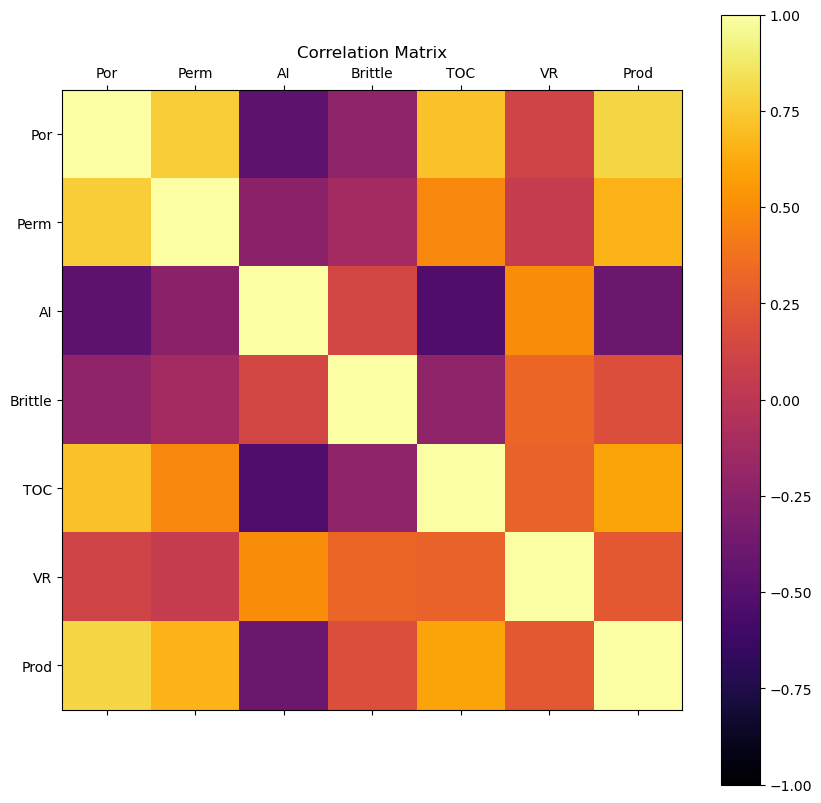

In [46]:
plot_corr(my_data.iloc[:, 1:-1],10)     # using our correlation matrix visualization function, remove Well and cProd
plt.show()


The correlation matrix and visualization plots show strong correlations for most of the predictor features.

### 6. Data Visaulization of Bivariate Pairwise Pairwise Relationships with a Scatter Plot Matrices
Observe for patterns in the pairwise relationships between predictor features, distributions, outliers, clusters, density, variance and boundaries.

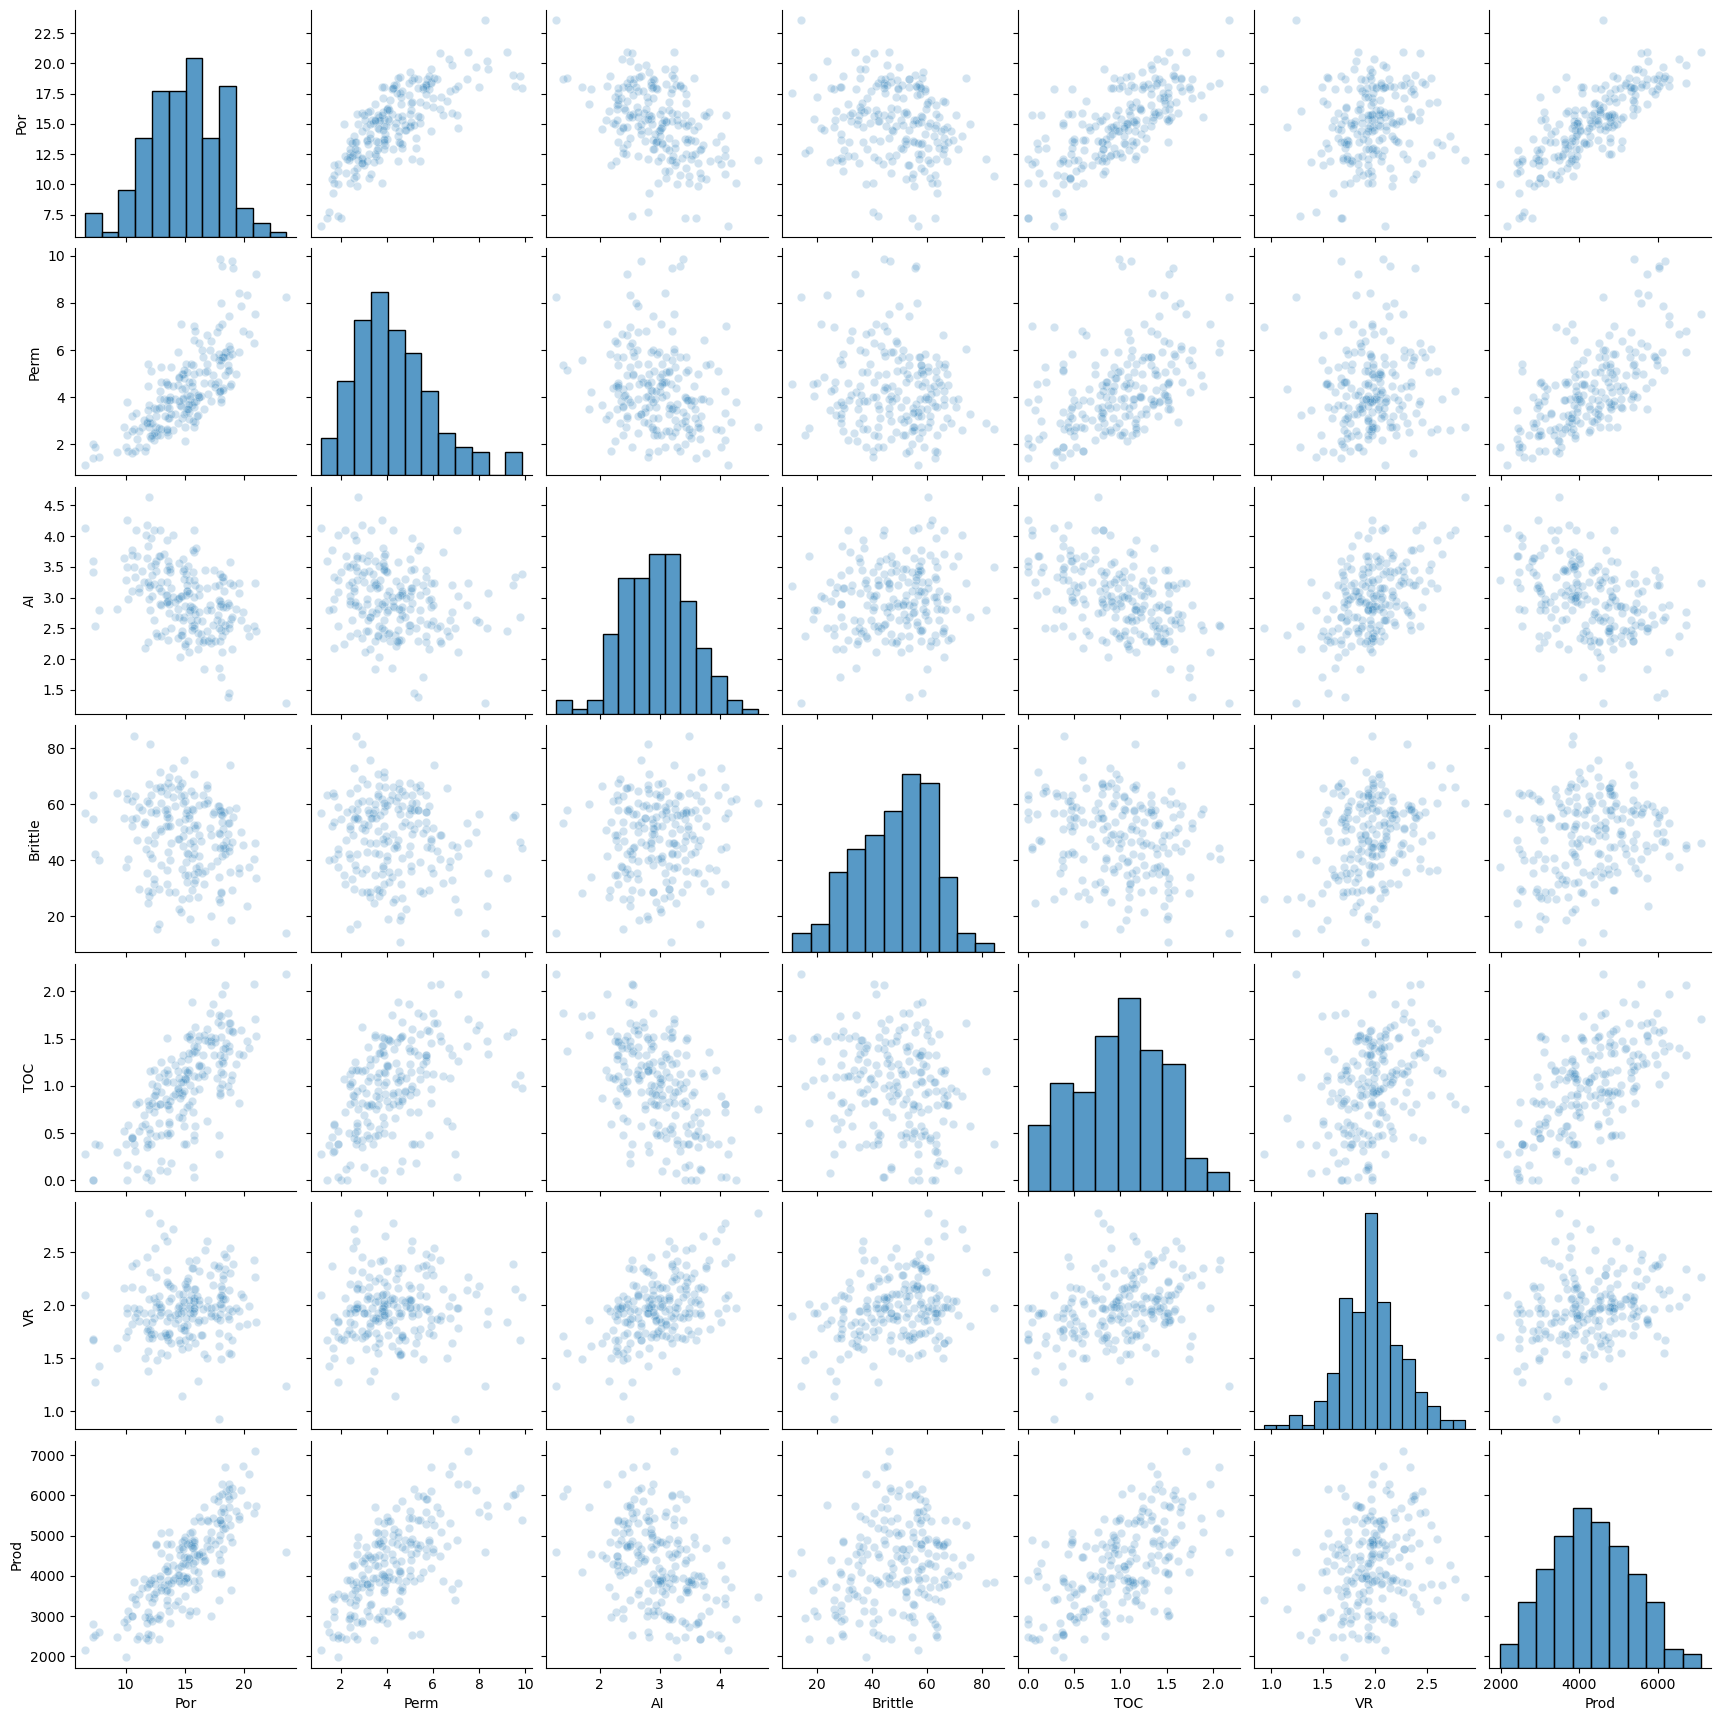

In [47]:
#Create plots using seaborn function with histograms of each variable
sns.pairplot(my_data,vars=['Por','Perm','AI','Brittle','TOC','VR','Prod'],markers='o',plot_kws={'alpha': 0.2})
plt.show()

We can observe some linear relationships,and some normally distributed features in this plot.

### 7. Data Preparation before Dimensionality Reduction

* Feature Selection: Based on observation of strong correlations in matrix and scatter plot, one could choose to reduce the number of features before performing dimensionality reduction.  However, in this workflow all 6 predictor features were used to have a better understanding of the feature combination effects.

* Standardize the features due to the dissimilarity of the units of measure, exclude Well (Index Number), cProd(low/high).

In [48]:
from sklearn.preprocessing import StandardScaler           
features = ['Por','Perm','AI','Brittle','TOC','VR'] #Define features to be standardized
x = my_data.loc[:,features].values
mu = np.mean(x, axis=0)                                    #Define variable to assign mean
sd = np.std(x, axis=0)                                     #Define variable to assign standard deviation
xs = StandardScaler().fit_transform(x)                     #Instatiate the scaler for standardization

ns_features = []                                           #Create empty array to add the standardized features
for i in range(0,len(features)):                           #Loop to add standardized features to original dataset
    my_data['NS_'+features[i]] = xs[:,i]
    ns_features.append('NS_'+features[i]) 

my_data.head(n=6)                                         #Preview the standardizded features have been added to the dataset for confirmation

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod,cProd,NS_Por,NS_Perm,NS_AI,NS_Brittle,NS_TOC,NS_VR
0,1,12.08,2.92,2.80,81.40,1.16,2.31,3809.000860,0,-0.982256,-0.817030,-0.298603,2.358297,0.352257,1.152048
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3938.029394,0,-0.881032,-0.463751,0.444147,-0.141332,-0.213702,-0.280931
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4262.097035,0,-0.327677,-1.008148,1.841224,1.748113,-0.213702,2.518377
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5324.587038,1,0.903875,1.401098,-0.599240,-0.592585,0.184565,-0.280931
4,5,17.52,4.57,3.18,10.94,1.51,1.90,4078.683686,0,0.853263,0.138561,0.373409,-2.640962,1.085907,-0.214280
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4661.932203,1,-0.155597,0.277556,-0.493133,0.385839,-0.108895,-0.980758


### 8. Data Visualization of all Standardized Features
Observe for patterns in the pairwise relationships between predictor features, distributions, outliers, clusters, density, variance and boundaries.

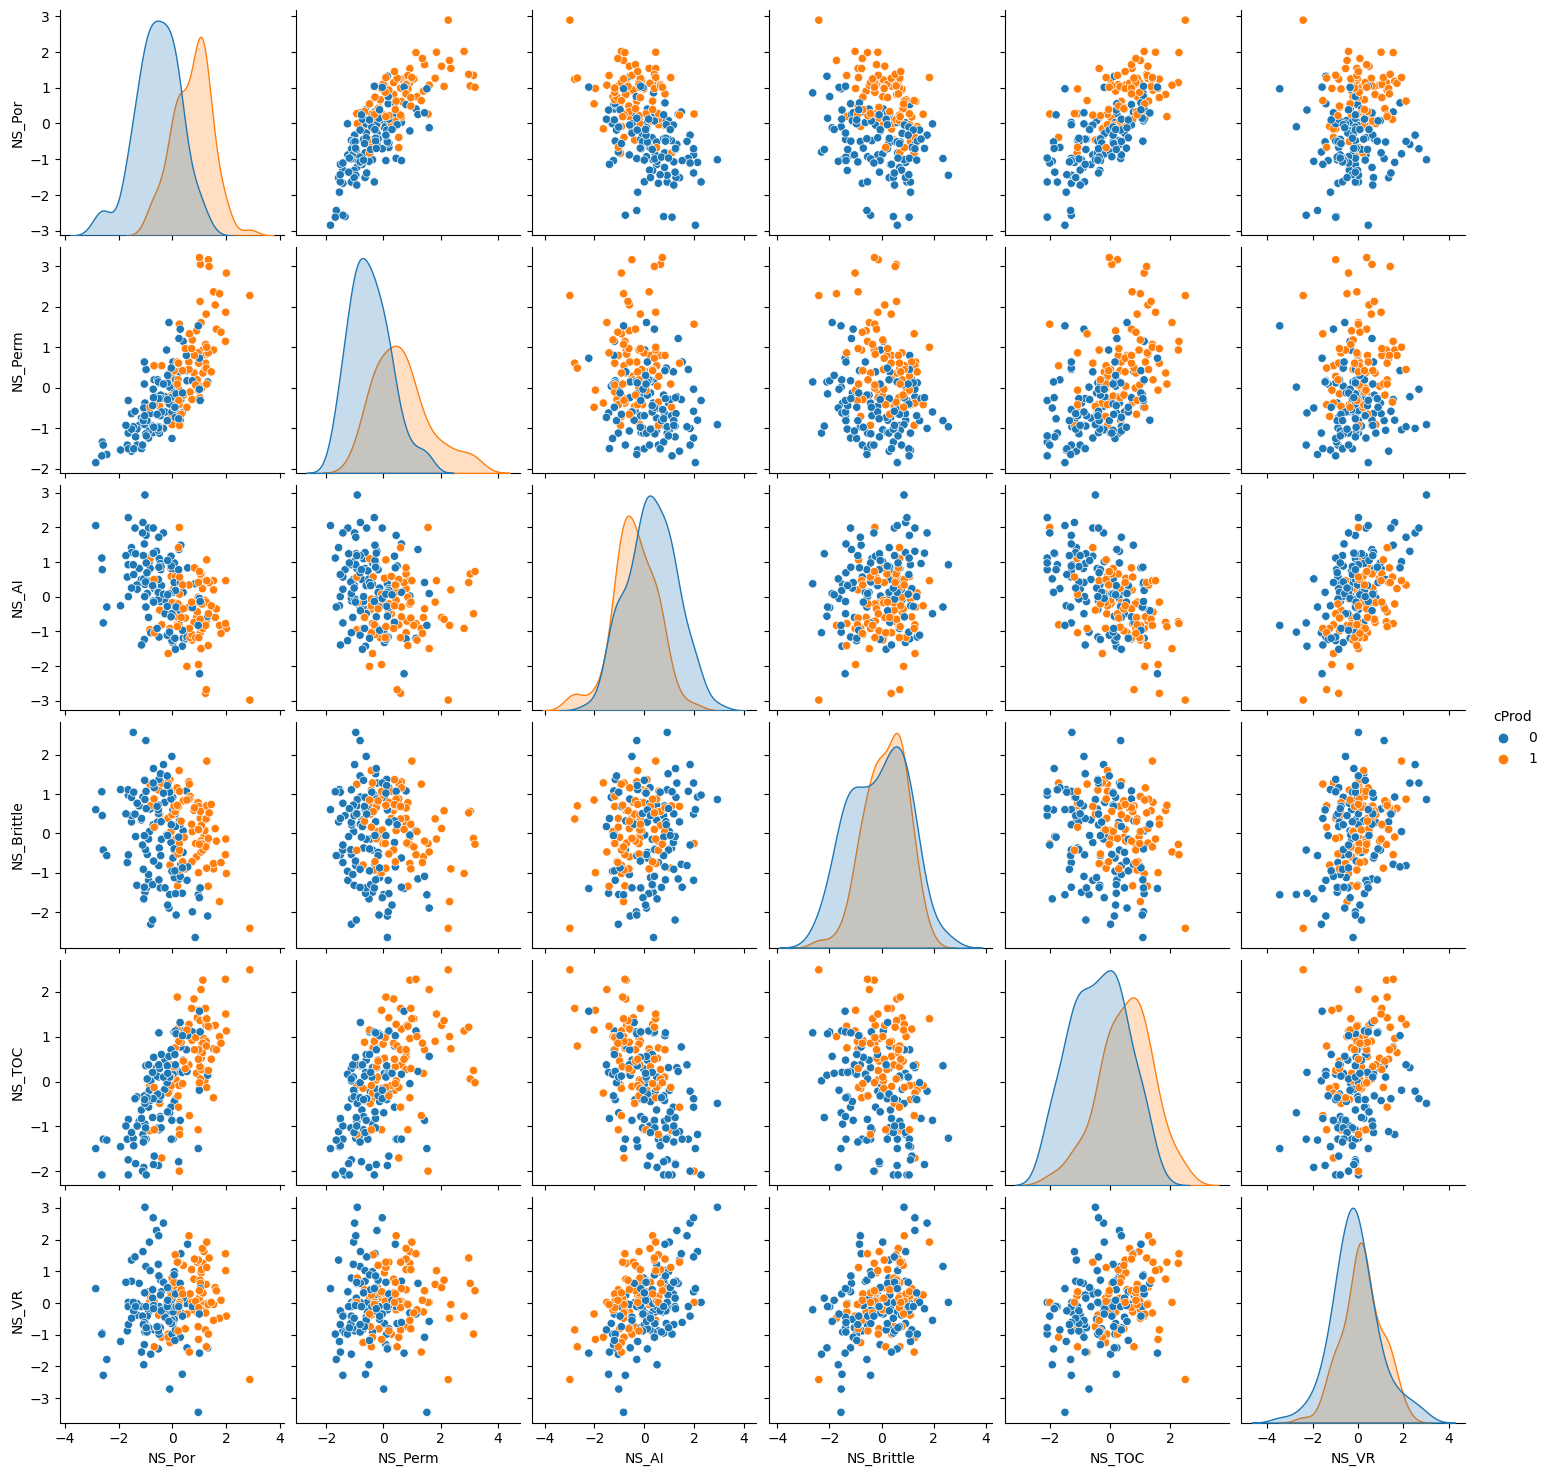

In [49]:
#Create plots using seaborn function with distributions for each standardized feature    
plot = sns.pairplot(my_data[ns_features + ['cProd']],markers='o',hue = 'cProd') #Colors data points by categorical low/high production, cProd


We can observe in these plots with normalized data, the variance adjustments, better definition of the data shapes, boundaries between the low and high production.


### 9. Dimensionality Reduction using UMAP
Hyper-parameters used: 

* n_neighbors; it sets the size of the neighborhood and has direct effect on the local and global structure. A higher value will result in more local detail and a higher computational expense. In contrast, a lower value will result in more global structure that will lose fine detail.

* min_dist; this controls the distance between points.

* n_components; it specifies the number of dimensions after reduction (number of combined features).

* metric; this controls how the distances are computed (euclidean, manhattan, mikowski, etc.).



In [50]:

reducer = umap.UMAP() #Instatiate the UMAP reducer

#Define function for embedding the features
#The output is an array with 200 samples but only 2 feature columns 

def create_umap_embedding(n_neighbors, min_dist, n_components, metric):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric=metric)
    embedding = reducer.fit_transform(my_data[ns_features])
    return embedding

# Set desired hyperparameters
n_neighbors = 30
min_dist = 0.3
n_components =2 
metric = 'euclidean'

# Create the UMAP embedding
embedding = create_umap_embedding(n_neighbors, min_dist, n_components, metric)

# Print the shape of the embedding (outputs: [n samples, m dimensions])
embedding.shape

(200, 2)

### 10. Visualization of Dimensionality Reduction


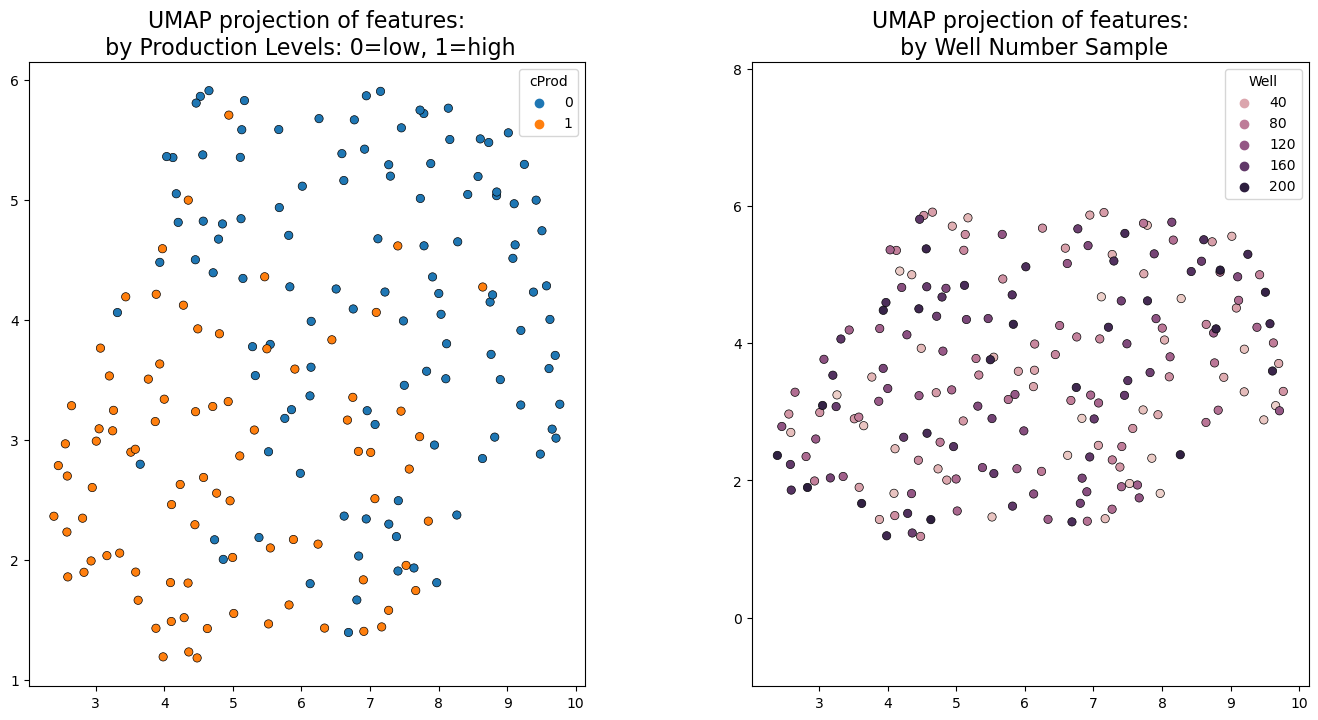

In [51]:
#Create scatter plots with embedded features

plt.subplot(121)
pairplot = sns.scatterplot(x = embedding[:, 0],y = embedding[:, 1],hue = my_data['cProd'],markers='o',palette = sns.color_palette(),edgecolor="black")
plt.title('UMAP projection of features:\n by Production Levels: 0=low, 1=high', fontsize=16)

plt.subplot(122)
pairplot = sns.scatterplot(x = embedding[:, 0],y = embedding[:, 1],hue = my_data['Well'],markers='o',edgecolor="black")
plt.title('UMAP projection of features:\n by Well Number Sample', fontsize=16)   #To assist with Interpretation


plt.subplots_adjust(left=0.0, bottom=0.0, right=2., top=1.3, wspace=0.3, hspace=0.2,)
plt.gca().set_aspect('equal','datalim')
plt.show()      

### 11. Model Check


* Calculate the original and projected pairwise distances between all the samples

* Cross plot the original vs the projected pairwise distances

* Plot the distribution of the ratio between projected/original pariwise distances


Distance Ratio, mean: 0.93, standard deviation 0.34.


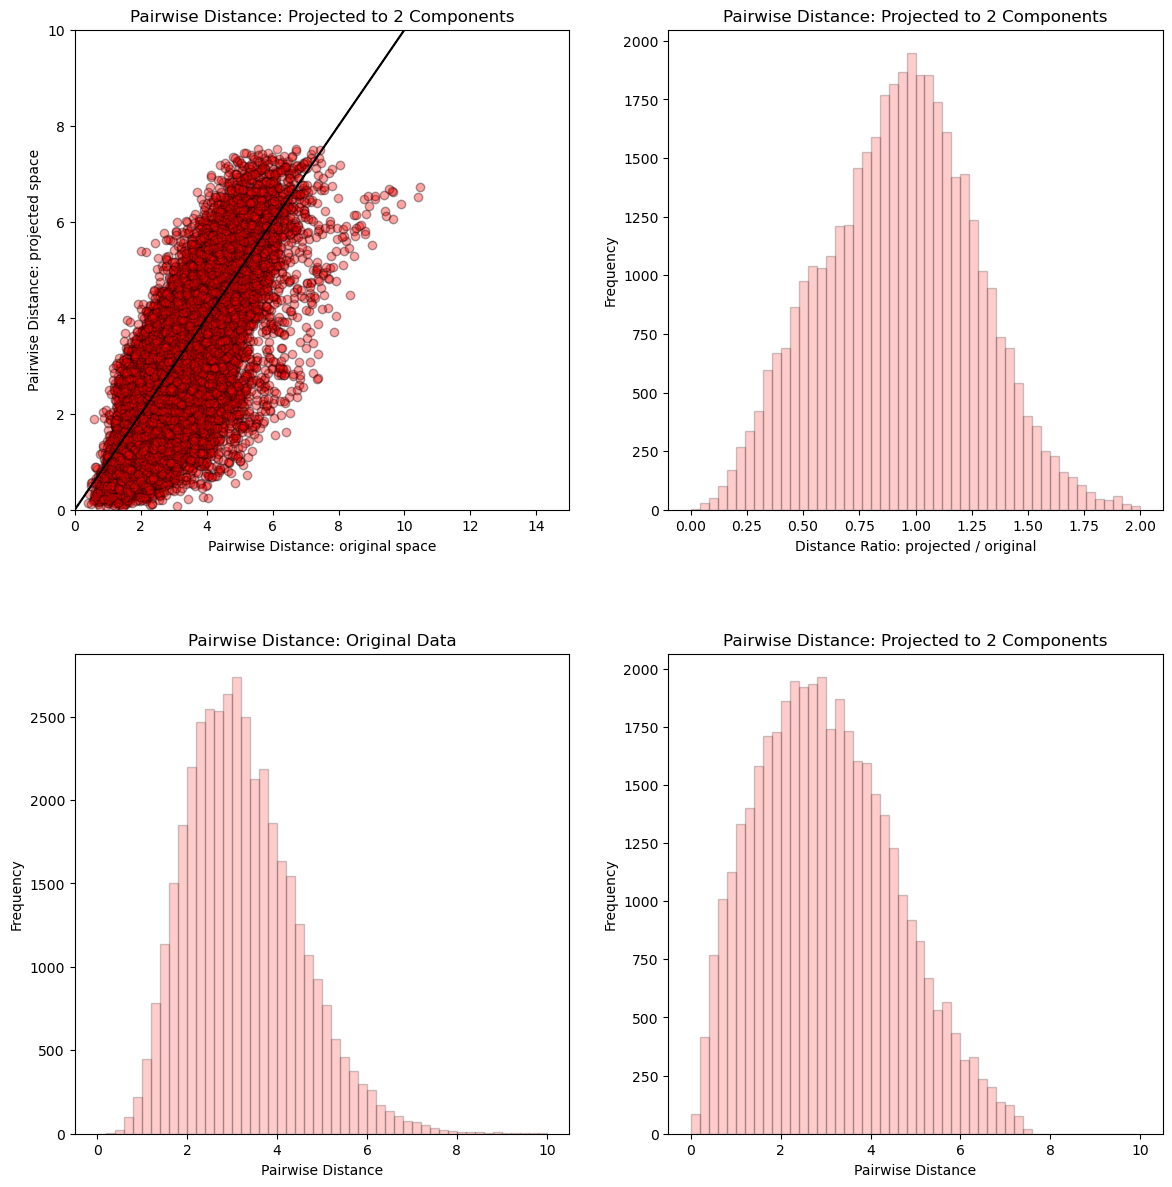

In [52]:
#Calculation of original and projected pairwise distances
dists = euclidean_distances(my_data[ns_features], squared=False).ravel() #calculate pairwise distances between all samples
nonzero = dists != 0                                                     #select only non-identical sample pairs
dists = dists[nonzero]                                                   #filter to only include rows for nonzero values                                                     
projected_dists = euclidean_distances(embedding, squared=False).ravel()[nonzero] #calculate projected pairwise distances

#Visualize pairwise distances of original vs projected distances (cross plot)
plt.subplot(221)
plt.scatter(dists,projected_dists,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,200,200,width=0.02,color='black',head_length=0.0,head_width=0.0)
plt.xlim(0,15); plt.ylim(0,10)
plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

#Calculate Ratio of projected distances to original distances
rates = projected_dists / dists
print("Distance Ratio, mean: %0.2f, standard deviation %0.2f." % (np.mean(rates), np.std(rates)))

#Visualize ratio of projected distances to original distances
plt.subplot(222)
plt.hist(rates, bins=50, range=(0, 2),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Distance Ratio: projected / original")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

#Visualize Original Distances Distribution
plt.subplot(223)
plt.hist(dists, bins=50, range=(0., 10),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Pairwise Distance")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Original Data")

#Visualize Projected Distances Distribution
plt.subplot(224)
plt.hist(projected_dists, bins=50, range=(0., 10),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Pairwise Distance")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=2.3, wspace=0.2, hspace=0.3)
plt.show()

### 12. Intepretability Improvement: Observe Specific Samples


For intepretability and verification that relationships between original features were preserved after dimensionality reduction.


In [53]:
df_subset = my_data.iloc[:50,:]     #select first n samples for visualization of original features
embedding = embedding[:50, :]       #select first n samples for visualization of projected features


#### Plot and Compare: specific well samples of original features vs. projected features and also include the well label for interpreting the results.


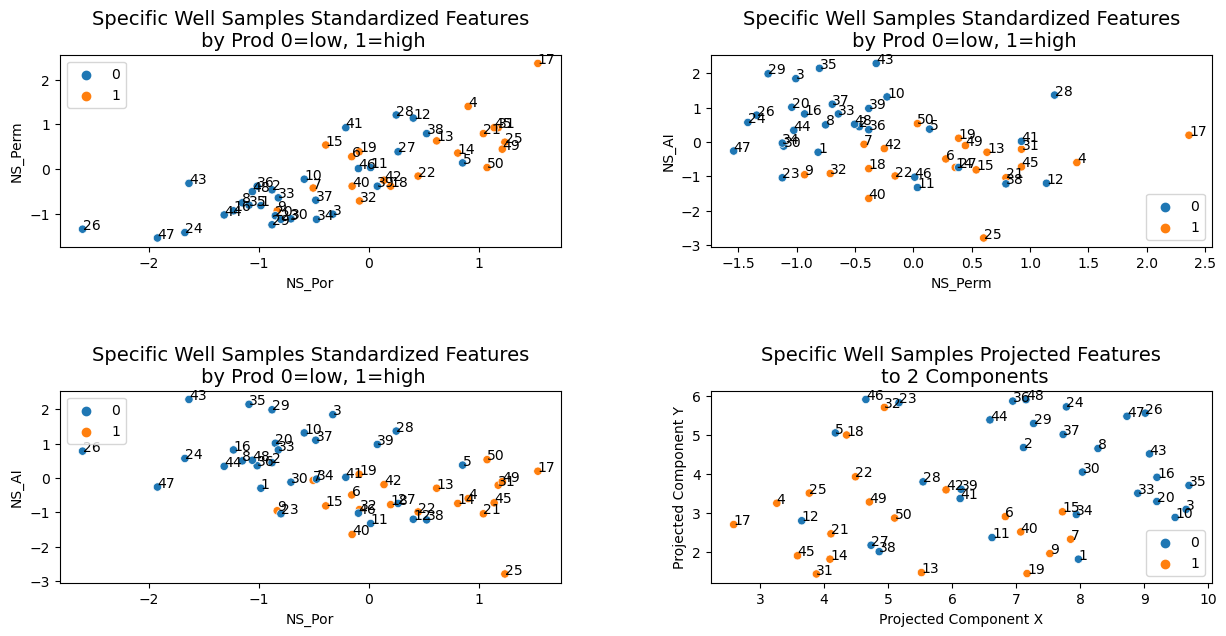

In [54]:
plt.subplot(321)
pairplot = sns.scatterplot(x = df_subset[ns_features[0]],y = df_subset[ns_features[1]],hue = df_subset['cProd'],markers='o')
for i, txt in enumerate(df_subset['Well']):
    pairplot.annotate(txt, (df_subset[ns_features[0]][i], df_subset[ns_features[1]][i]))
pairplot.legend(loc='upper left')  
plt.title('Specific Well Samples Standardized Features\n by Prod 0=low, 1=high', fontsize=14)

plt.subplot(322)
pairplot = sns.scatterplot(x = df_subset[ns_features[1]],y = df_subset[ns_features[2]],hue = df_subset['cProd'],markers='o')
for i, txt in enumerate(df_subset['Well']):
    pairplot.annotate(txt, (df_subset[ns_features[1]][i], df_subset[ns_features[2]][i]))
pairplot.legend(loc='lower right')     
plt.title('Specific Well Samples Standardized Features\n by Prod 0=low, 1=high', fontsize=14)

plt.subplot(323)
pairplot = sns.scatterplot(x = df_subset[ns_features[0]],y = df_subset[ns_features[2]],hue = df_subset['cProd'],markers='o')
for i, txt in enumerate(df_subset['Well']):
    pairplot.annotate(txt, (df_subset[ns_features[0]][i], df_subset[ns_features[2]][i]))
pairplot.legend(loc='upper left')     
plt.title('Specific Well Samples Standardized Features\n by Prod 0=low, 1=high', fontsize=14)

plt.subplot(324)
pairplot = sns.scatterplot(x = embedding[:, 0],y = embedding[:, 1],hue = df_subset['cProd'],markers='o')
for i, txt in enumerate(df_subset['Well']):
    pairplot.annotate(txt, (embedding[i,0], embedding[i,1]))
pairplot.set_xlabel('Projected Component X'); pairplot.set_ylabel('Projected Component Y')  
pairplot.legend(loc='lower right') 
plt.title("Specific Well Samples Projected Features\n to %d Components" % n_components, fontsize=14)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.8, wspace=0.3, hspace=0.75)
plt.show()

### 13. Results


After multiple iterations of varying hyper-parameters, mainly those of n_neighbors and min_dist, resulted in a distance ratio mean: 0.93, and standard deviation 0.33. In addition, the projected UMAP plot resulted in a shape with natural clustering, good separation between points which appeared to have preserved the features' original paiwise distances. The metric hyper-parameter did not seem to have a huge effect in this particular analysis. In addition, no issues were observed with the noise levels.

Final hyper-parameters were set to: 
n_neighbors = 30
min_dist = 0.3
n_components =2 
metric = 'euclidean'


### Lydia Mata Mireles
-Mechanical Engineer for 20 years designing Drill-Through Equipment for NOV, Inc.

-PhD Student at Hildebrand Department of Petroleum and Geosystems Engineering, University of Texas at Austin


**Research Interests:**
* Machine Learning
* CCUS
* Hydrogen Production 
* Methane Production
* Geothermal Energy Production
* Hydraulic Fracturing


Feel free to contact me about anything related to this workflow.

___________________

### Work Supervised by:

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17+ years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more getting in touch with Professor Pyrcz, click on these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
